In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
simulations = [
  "simulation-baseline",
  "simulation-flashmd",
  "simulation-flashmd-symplectic",
  "simulation-flashmd-omatpes",
]

In [3]:
out_files = {name: np.loadtxt(name + "/md.out") for name in simulations}
dfs = {name: pd.DataFrame(frame, columns=["step", "time", "conserved", "temperature"]).astype({"step": int}).set_index("step") for name, frame in out_files.items()}
dfs["simulation-baseline"].head()

,time,conserved,temperature
step,,,
0,0.000,-7.795911,281.497480
1,0.001,-7.795911,341.251899
2,0.002,-7.795912,265.825062
3,0.003,-7.795913,299.073033
4,0.004,-7.795913,346.877868


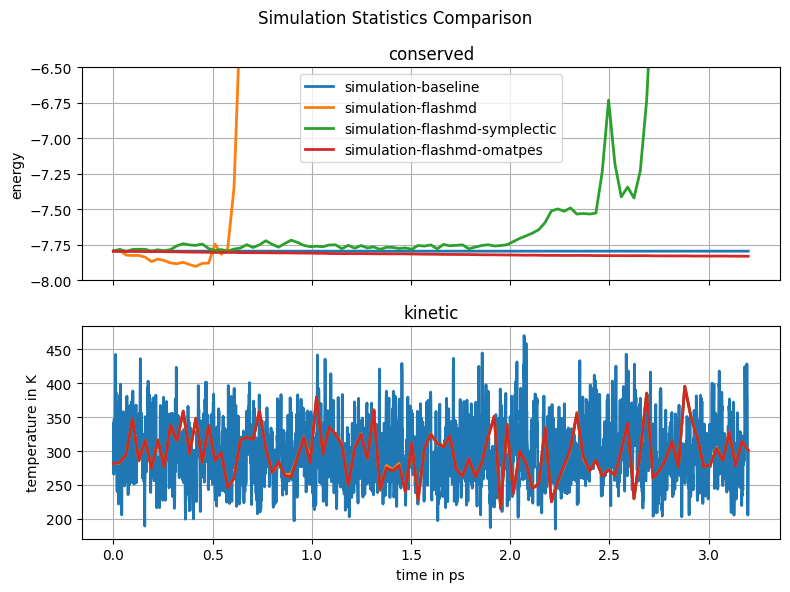

In [4]:
fig, axs = plt.subplots(figsize=(8, 6), nrows=2, sharex=True)
fig.suptitle("Simulation Statistics Comparison")
ax_conserved, ax_temperature = axs
for ax in axs:
  ax.grid()
ax_conserved.set(ylabel="energy", title="conserved")
ax_conserved.set_ylim(-8, -6.5)
ax_temperature.set(xlabel="time in ps", ylabel="temperature in K", title="kinetic")
for name, df in dfs.items():
  ax_conserved.plot(df["time"], df["conserved"], label=name, lw=2)
  ax_temperature.plot(df["time"], df["temperature"], label=name, lw=2)
ax_conserved.legend()
fig.tight_layout()